## Определение перспективного тарифа для телеком-компании

Клиентам федерального оператора сотовой связи «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Коммерческий департамент поставил задачу: понять, какой тариф приносит больше денег

**Цель:** 
определить, какой из двух тарифов оператора сотовой связи более прибыльный

**Задачи:** 
- сделать предварительный анализ тарифов на выборке клиентов
- проанализировать поведение клиентов
- сделать вывод, какой тариф более выгодный

**Содержание**

1. [Изучение данных](#1id)
    * [Проверка таблицы "calls"](#1.1id)
    * [Проверка таблицы "internet"](#1.2id)
    * [Проверка таблицы "messages"](#1.3id)
    * [Проверка таблицы "tariffs"](#1.4id)
    * [Проверка таблицы "users"](#1.5id)
2. [Подготовка данных](#2id)
    * [Перевод типов данных](#2.1id)
    * [Поиск ошибок](#2.2id)
    * [Рассчет количества сделанных звонков и израсходованных минут разговора по месяцам](#2.3id)
    * [Рассчет количества отправленных сообщений по месяцам](#2.4id)
    * [Рассчет объема израсходованного интернет-трафика по месяцам](#2.5id)
    * [Рассчет помесячной выручки с каждого пользователя](#2.6id)
3. [Анализ данных](#3id)
    * [Удаляем выбросы](#3.1id)
    * [Количество минут разговора по каждому тарифу в месяц ](#3.2id)
    * [Количество сообщений, которые используют клиенты  каждого тарифа в месяц ](#3.3id)
    * [Объём интернет-трафика](#3.4id)
4. [Проверка гипотез](#4id)
    * [Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются ](#4.1id)
    * [Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#4.2id)
5. [Общий вывод](#5id)

## 1. Изучение данных <a id="1id"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

### 1.1 Проверка таблицы "calls" <a id="1.1id"></a>

**Информация о звонках**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [2]:
try: 
    calls = pd.read_csv('/home/olga/Downloads/calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Пропущенных значений нет. Чуть позже заменим тип данных в столбце call_date на datetime, а длительность звонка округлим до целых минут

### 1.2 Проверка таблицы "internet" <a id="1.2id"></a>

**Информация об интернет-сессиях**

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [5]:
try:
    internet = pd.read_csv('/home/olga/Downloads/internet.csv', index_col=0)
except:
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Пропущенных значений нет. Объем трафика указан в мегабайтах. Удобно будет добавить дополнительный столбец с переводом в гигабайты и округлением до целого в большую сторону.
Тип данных столбца session_date поменяем на datetime

### 1.3 Проверка таблицы "messages" <a id="1.3id"></a>

**Информация о сообщениях:**

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [8]:
try:
    messages = pd.read_csv('/home/olga/Downloads/messages.csv')
except:
    messages = pd.read_csv('/datasets/messages.csv')
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропущенных значений нет. Колонку message_date приведем к типу datetime

### 1.4 Проверка таблицы "tariffs" <a id="1.4id"></a>

Информация о тарифах:

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
try:
    tariffs = pd.read_csv('/home/olga/Downloads/tariffs.csv')
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Тут тоже все в порядке

### 1.5 Проверка таблицы "users" <a id="1.5id"></a>

**Информация о пользователях:**

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

In [12]:
try:
    users = pd.read_csv('/home/olga/Downloads/users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В колонке "churn_date" много пропущенных данных. Оставим их без изменений

## 2. Подготовка данных <a id="2id"></a>

### 2.1 Перевод типов данных <a id="2.1id"></a>

Заменим занчения необходимых столбцов на тип datetime.
Округлим секунды до минут, а мегабайты — до гигабайт в большую сторону. 

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [15]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')
tariffs['mb_per_month_included'] = np.ceil(tariffs['mb_per_month_included']).astype('int')

Для удобства объединения таблиц переменуем в таблице "tariffs" столбец "tariff_name" на "tariff"

In [16]:
tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### 2.3 Рассчет количества сделанных звонков и израсходованных минут разговора по месяцам <a id="2.3id"></a>

In [17]:
calls['month'] = calls['call_date'].dt.month # выделим месяцы в отдельную колонку

In [18]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count','sum']).reset_index(drop=False)
calls_pivot.columns = ['user_id', 'month', 'count_calls', 'total_duration']
calls_pivot.head(10)

# count_calls - количество звонков
# total_duration - израсходованные минуты

,user_id,month,count_calls,total_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


### 2.4 Рассчет количества отправленных сообщений по месяцам <a id="2.4id"></a>

In [19]:
messages['month'] = messages['message_date'].dt.month

In [20]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index(drop=False)
messages_pivot.columns = ['user_id', 'month', 'count_message']
messages_pivot.head()

# count_message - количество сообщений

,user_id,month,count_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### 2.5 Рассчет объема израсходованного интернет-трафика по месяцам <a id="2.5id"></a>

In [21]:
internet['month'] = internet['session_date'].dt.month

In [22]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index(drop=False)
internet_pivot.columns = ['user_id', 'month', 'mb_used_total']
internet_pivot.head()

# mb_used_total - объем израсходованного трафика

,user_id,month,mb_used_total
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


### 2.6 Рассчет помесячной выручки с каждого пользователя <a id="2.6id"></a>

Соединим все три сводные таблицы в одну

In [23]:
df_merged = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer').reset_index(drop=True)
df_merged.head()

,user_id,month,count_calls,total_duration,count_message
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


In [24]:
df_merged = df_merged.merge(internet_pivot, on=['user_id', 'month'], how='outer').reset_index(drop=True) 
df_merged.head()

,user_id,month,count_calls,total_duration,count_message,mb_used_total
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0


In [25]:
df_merged = df_merged.merge(users, on='user_id', how='left').reset_index(drop=True) 
df_merged.head()

,user_id,month,count_calls,total_duration,count_message,mb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [26]:
df_merged = df_merged.merge(tariffs, on='tariff', how='left').reset_index(drop=True)
df_merged.columns

Index(['user_id', 'month', 'count_calls', 'total_duration', 'count_message',
       'mb_used_total', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute'],
      dtype='object')

In [27]:
# количество строк в таблице
df_merged['user_id'].count()

3214

In [28]:
# посмотрим на пустые значения общей таблицы
df_merged.isna().sum()

user_id                     0
month                       0
count_calls                40
total_duration             40
count_message             497
mb_used_total              11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Пропуски есть в звонках, смс и потраченном интернет-трафике. Предположим, что клиенты просто не пользовались теми услугами в определенном месяце, в которых значения пропущены. Заменим нулями

In [29]:
df_merged['count_calls'] = df_merged['count_calls'].fillna(0)
df_merged['total_duration'] = df_merged['total_duration'].fillna(0)
df_merged['count_message'] = df_merged['count_message'].fillna(0)
df_merged['mb_used_total'] = df_merged['mb_used_total'].fillna(0)

Создадим функцию, которая вычислит по каждому из трех показателей (звонки, сообщения, интернет) перерасход лимита согласно тарифу

In [30]:
def count_revenue(row):
    calls = (row['total_duration'] - row['minutes_included']) * row['rub_per_minute']
    message = (row['count_message'] - row['messages_included']) * row['rub_per_message']
    internet = np.floor(row['mb_used_total'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024
        
    total = 0
    for i in [calls, message, internet]:
        if i > 0:
            total += i
    return total

Создадим столбец с перерасходом тарифа и добавим после абонентскую плату - это будет столбец выручки

In [31]:
df_merged['extra'] = df_merged.apply(count_revenue, axis=1)
df_merged['revenue'] = df_merged['extra'] + df_merged['rub_monthly_fee']

In [32]:
df_merged['revenue'].sample(7)

3021     550.000000
555      784.960938
814     1228.351562
1258    1135.000000
2267    1950.000000
2513    1116.351562
3110     550.000000
Name: revenue, dtype: float64

In [33]:
df_merged.drop('extra', axis=1).head()

,user_id,month,count_calls,total_duration,count_message,mb_used_total,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,22.0,159.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


## 3. Анализ данных <a id="3id"></a>

### 3.1 Удаляем выбросы <a id="3.1id"></a>

Проверим датасет на сильно выбивающиеся значения и удалим их. Посчитаем среднее, дисперсию и стандартное отклонение

In [34]:
# разделим датафрейм на два по тарифу
smart_revenue = df_merged[df_merged['tariff'] == 'smart']
ultra_revenue = df_merged[df_merged['tariff'] == 'ultra']

In [35]:
def func_stat(df, column):
    
    mean = np.mean(df[column]) # среднее
    variance = np.var(df[column]) # дисперсия
    standart = np.sqrt(variance) # стандартное отклонение
    upp_limit = mean + 3*standart # верхняя граница, которая покажет, где искать выбросы
    
    df.boxplot(column, vert=False)
    df[column].hist(bins=100)
    print('Среднее значение:', float(mean))
    print('Дисперсия:', float(variance))
    print('Стандартное отклонение:', float(standart))
    print('Верхняя граница:', float(upp_limit))

Среднее значение: 1233.3494665489009
Дисперсия: 620174.2528422166
Стандартное отклонение: 787.5114302930572
Верхняя граница: 3595.8837574280724


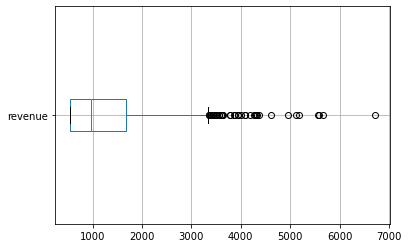

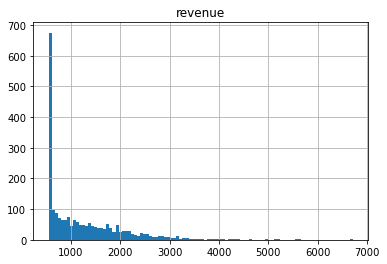

In [36]:
func_stat(smart_revenue, ['revenue'])

Среднее значение: 2060.5299710501267
Дисперсия: 126824.39887571629
Стандартное отклонение: 356.12413408208704
Верхняя граница: 3128.902373296388


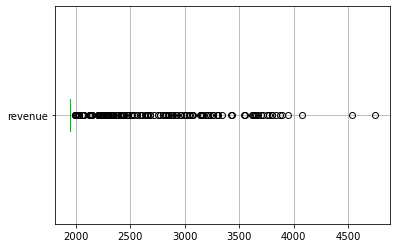

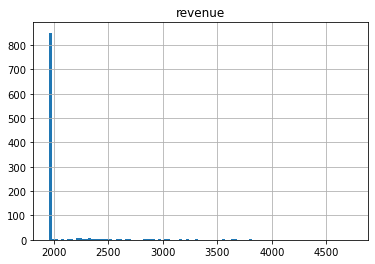

In [37]:
func_stat(ultra_revenue, ['revenue'])

Стандартное отклонение у тарифа smart достаточно большое - 788 руб, в противоположность тарифу ultra - всего 356 руб. То есть клиенты smart переплачивают больше и чаще. Средние знечения также указывают на то, что клиентам smart приходится платить поверх своего тарифа больше, чем это делают клиенты ultra

Чтобы последние два графика были более информативны, построим гистограммы по двум тарифам на одном графике - так будет заметна разница:

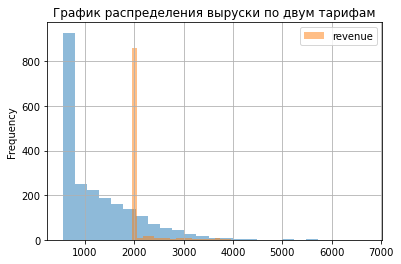

In [38]:
x = df_merged[df_merged['tariff'] == 'smart']['revenue']
y = df_merged[df_merged['tariff'] == 'ultra']['revenue']

x.plot(
    kind='hist',
    bins=25,
    linewidth=5,
    alpha=0.5,
    label='raw',
)

y.plot(
    kind='hist',
    bins=25,
    linewidth=5,
    alpha=0.5,
    grid=True,
    legend=True,
)

plt.title('График распределения выруски по двум тарифам');

In [39]:
# удаляем выбросы в тарифе smart
smart_revenue = df_merged.query('(tariff == "smart") & (revenue < 3700)')

In [40]:
# удаляем выбросы в тарифе ultra
ultra_revenue = df_merged.loc[(df_merged['tariff'] =='ultra')&(df_merged['revenue'] < 3200)]

Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

### 3.2 Количество минут разговора по каждому тарифу в месяц <a id="3.2id"></a>

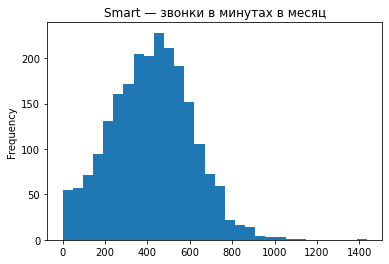

In [41]:
df_merged[df_merged['tariff'] == 'smart']['total_duration'].plot(kind='hist', bins=30)
plt.title('Smart — звонки в минутах в месяц');

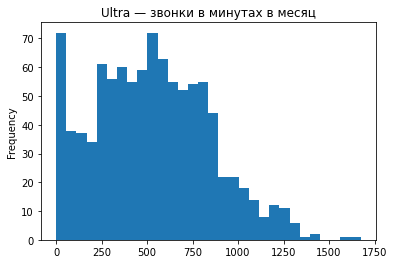

In [42]:
df_merged[df_merged['tariff'] == 'ultra']['total_duration'].plot(kind='hist', bins=30)
plt.title('Ultra — звонки в минутах в месяц');

Клиенты тарифа 'smart' в большинстве случаев разговаривают по телефону в пределах своего тарифа: 500-550 минут. У клиентов тарифа 'ultra' два пика: есть те, кто вообще не использует звонки (возможно, для них актуальны звонки через мессенджеры, так как интернет-трафика у них больше). Второй пик - около 600 минут, то есть клиенты зачастую не успевают дойти до ограничения своего тарифа по звонкам. 

### 3.3 Количество сообщений, которые используют клиенты  каждого тарифа в месяц <a id="3.3id"></a>

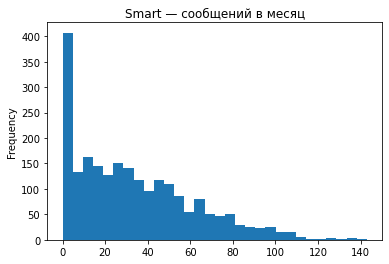

In [43]:
df_merged[df_merged['tariff'] == 'smart']['count_message'].plot(kind='hist', bins=30)
plt.title('Smart — сообщений в месяц');

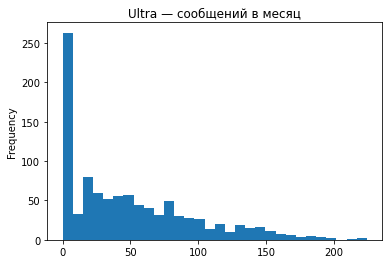

In [44]:
df_merged[df_merged['tariff'] == 'ultra']['count_message'].plot(kind='hist', bins=30)
plt.title('Ultra — сообщений в месяц');

Распределения частоты по использованию смс обоих тарифов схожи. Большинство клиентов вообще не используют смс в качестве коммуникации. Чуть чаще всё же отправляют смс клиенты smart-тарифа

### 3.4 Объём интернет-трафика  <a id="3.4id"></a>

In [45]:
# создалим отдельный столбец для перевода в гигабайты
df_merged['gb_used_total'] = df_merged['mb_used_total'] / 1024

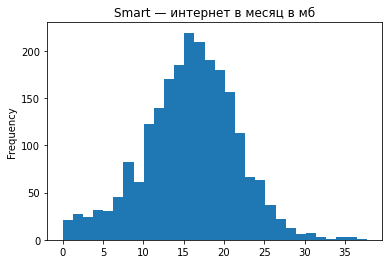

In [46]:
df_merged[df_merged['tariff'] == 'smart']['gb_used_total'].plot(kind='hist', bins=30)
plt.title('Smart — интернет в месяц в мб');

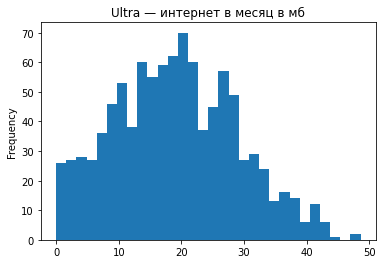

In [47]:
df_merged[df_merged['tariff'] == 'ultra']['gb_used_total'].plot(kind='hist', bins=30)
plt.title('Ultra — интернет в месяц в мб');

Для наглядности построим общий график:

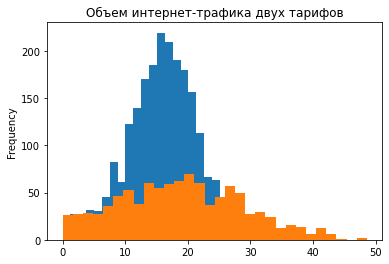

In [48]:
x = df_merged[df_merged['tariff'] == 'smart']['gb_used_total'].plot(kind='hist', bins=30)
y = df_merged[df_merged['tariff'] == 'ultra']['gb_used_total'].plot(kind='hist', bins=30)

x.plot(
    kind='hist',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.3,
    label='raw',
)

y.plot(
    kind='hist',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.3,
    label='filtered',
    grid=True,
    legend=True,
)

plt.title('Объем интернет-трафика двух тарифов');

Клиенты тарифа smart, как правило, немного превышают объем интернет-трафика, установленный тарифом (в месяц тратят 16-17 ГБ), то есть докупают дополнительные ГБ. Клиенты тарифа ultra в большинстве случаев не превышают лимит своего тарифа (два пика: примерно 20 и 28 ГБ).

**Общий вывод**

Клиенты обоих тарифов редко используют смс. Количество потраченных минут на звонки немного больше у клиентов ultra. Объем потраченного интернет-трафика примерно одинаковый. Однако клиенты тарифа smart зачастую выходят за лимит своего тарифа и оплачивают дополнительные мегабайты

## 4. Проверка гипотез <a id="4id"></a>

### 4.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются <a id="4.1id"></a>

Для проверки гипотезы сформулируем нулевую и альтернативную гипотезы:
- H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
- H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Наша альтернативная гипотеза двусторонняя. Для проверки гипотез используем t-test_ind, так как выборки не зависят друг от друга. Уровень статистической значимости зададим в 5%

In [49]:
smart_revenue = df_merged[df_merged['tariff'] == 'smart']['revenue']
ultra_revenue = df_merged[df_merged['tariff'] == 'ultra']['revenue']

alpha = .05

results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.931402711368788e-296
Отвергаем нулевую гипотезу


**Вывод**

Разница между выборками слишком велика, чтобы считать это случайностью. Отвергаем гипотезу о равенстве выручек двух тарифов.

### 4.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов <a id="4.2id"></a>

Для проверки гипотезы сформулируем нулевую и альтернативную гипотезы:
- H0: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [50]:
from_moscow = df_merged[df_merged['city'] == 'Москва']['revenue']
not_from_moscow = df_merged[df_merged['city'] != 'Москва']['revenue']

alpha = .05

results = st.ttest_ind(from_moscow, not_from_moscow, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


**Вывод**

В данном случае уровень статистической значимости слишком большой, чтобы делать вывод о значимом различии между двумя тарифами(46%). 

## 5. Общий вывод <a id="5id"></a>

В исследовании мы сравнили поведение клиентов оператора «Мегалайн» по двум тарифам: "Smart" и "Ultra". 

Перед анализом мы произвели подготовку данных: 
- привели данные к нужным типам
- исправили ошибки
- удалили выбросы
- рассчитали дополнительные данные для анализа (количество сделанных звонков, отправленных сообщений, объем использованного интернет-трафика, помесячную выручку с каждого пользователя)

С помощью дополнительных данных мы проанализировали поведение клиентов: какой объем трафика, количество минут и смс используют клиенты одного и другого тарифа. Для этого мы рассчитали среднее, дисперсию и стандартное отклонение. Согласно получившимся распределениям, можем сделать следующие выводы:
- клиенты тарифа smart в среднем переплачивают больше на 788 руб, в противоположность тарифу ultra - всего 356 руб.
- средние знечения также указывают на то, что клиентам smart приходится платить поверх своего тарифа больше, чем это делают клиенты ultra

Более детально:
- смс-сообщения непопулярны у клиентов обоих тарифов. Большая часть клиентов не использует даже половины включенных в тариф сообщений
- количество телефонных звонков, как правило, у клиентов обоих тарифов не выходит за лимит. Значительная часть клиентов тарифа ultra вообще не использует звонки
- объем потраченного интернет-трафика примерно одинаковый. Однако клиенты тарифа smart зачастую выходят за лимит своего тарифа и оплачивают дополнительные мегабайты

Также мы проверили две гипотезы и получили следующие результаты:
- удалось опровергнуть гипотезу о том, что средние выручки обоих тарифов одинаковые. Есть существенные различия
- не можем подтвердить гипотезу о том, что средняя выручка в Москве отличается от выручки в регионах


**Итог:** Пользователи обоих тарифов почти не используют сообщения, чаще совершают звонки и тратят интернет-трафик выше своего лимита.
Не смотря на то, что стоимость тарифа "Ultra" выше, клиенты "Smart" чаще выходят за лимиты своего тарифа и доплачивают за дополнительные гигабайты трафика. Можно предположить, что клиенты, выбирая тариф "Smart", пытаются сэкономить. Однако, как видно из анализа, зачастую им приходится переплачивать за интернет-трафик.
На данный момент более перспективным тарифом является "Smart" за счет больших переплат. Компании следует оптимизировать условия обоих тарифов, чтобы более точно отвечать запросам клиентов. Как вариант, снизить в каждом тарифе количество бесплатных смс и минут на звонки в пользу интернет-трафика.